<a href="https://colab.research.google.com/github/pradiptars/Ml_kaggle_rainfall/blob/main/rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
df = pd.concat([train, test])

In [7]:
df.head(2)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1.0
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1.0


In [8]:
df.isnull().sum()

,0
id,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
sunshine,0


In [13]:
df['winddirection'].fillna(df['winddirection'].mean(), inplace=True)
df['rainfall'].fillna(df['rainfall'].mode()[0], inplace=True)

In [14]:
df.isnull().sum()

,0
id,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
sunshine,0


<Axes: >

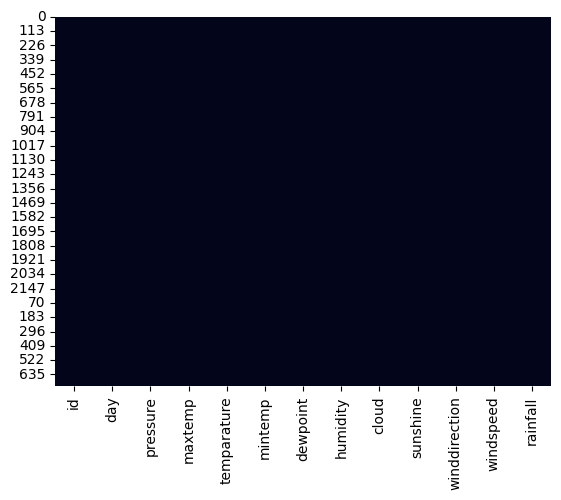

In [15]:
sns.heatmap(df.isnull(), cbar=False)

<Axes: >

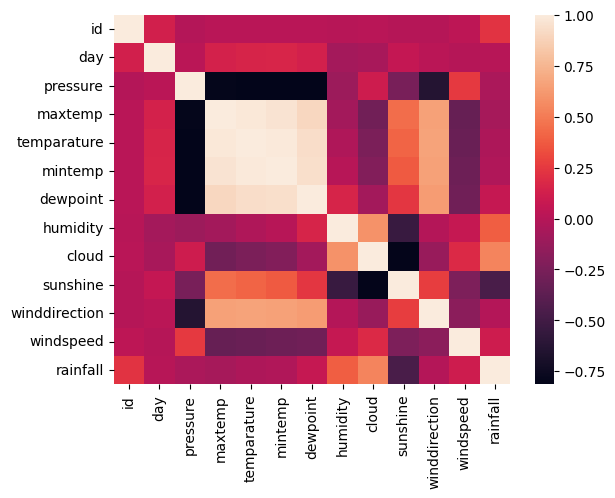

In [16]:
sns.heatmap(df.corr())

In [17]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [18]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(df)
df = scaler.transform(df)


In [19]:
train_len = train.shape[0]
X_train = df[:train_len]
X_test = df[train_len:]
y_train = train['rainfall']

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(2190, 13)
(730, 13)
(2190,)


In [21]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

In [22]:
def test_model(model, X_train, y_train):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=r2)
    score = [r2_val_score.mean()]
    return score

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
test_model(lr, X_train, y_train)

[np.float64(1.0)]

In [24]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=0.1)
test_model(ridge, X_train, y_train)

[np.float64(0.9999998250703207)]

In [25]:
lasso = Lasso(alpha=0.1)
test_model(lasso, X_train, y_train)

[np.float64(0.6899321450842305)]

In [26]:
from sklearn.svm import SVR
svr = SVR()
test_model(svr, X_train, y_train)

[np.float64(0.9762362068966308)]

In [27]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
test_model(dt, X_train, y_train)

[np.float64(1.0)]

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, n_estimators=1000)
test_model(rf, X_train, y_train)

[np.float64(1.0)]

In [29]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
br = BaggingRegressor(random_state=42, n_estimators=1000)
gb = GradientBoostingRegressor(random_state=42, n_estimators=1000)

In [30]:
test_model(br, X_train, y_train)

[np.float64(1.0)]

In [31]:
test_model(gb, X_train, y_train)

[np.float64(0.9999999999999989)]

In [32]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42, bbooster='gbtree')
test_model(xgb_model, X_train, y_train)

[np.float64(1.0)]

In [34]:
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
!pip install matplotlib-venn

In [37]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [38]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 126315 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1.3_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1.3) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1.3) ...
Processing triggers for man-db (2.10.2-1) ...
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.1 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31629 sha256=598d5992a5f489febaedcb6c343afc4c4ab238a2b086fe7f08a15434baed97fd
  Stored in directory: /root/.cache/pip/wheels/32/98/bd/4893d6923dd027f455b250367d402bfd69a6f4416581df46db
Successfully built libarchive


In [39]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 36.7 MB/s eta 0:00:00


In [40]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [42]:
y_pred = np.exp(lr.predict(X_test))

In [43]:
y_pred

array([2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828183,
       2.71828183, 2.71828183, 2.71828183, 2.71828183, 2.71828

In [45]:
submit_test = pd.concat([test['id'], pd.DataFrame(y_pred, columns=['rainfall'])], axis=1)
submit_test.head()

,id,rainfall
0,2190,2.718282
1,2191,2.718282
2,2192,2.718282
3,2193,2.718282
4,2194,2.718282


In [47]:
submit_test.to_csv('rainfall_submission.csv', index=False)